# SWAP test

Questo circuito valuta la similarità tra due stati quantistici. Il rapporto $\frac{\text{misurazioni }|0\rangle}{\text{misurazioni totali}}$ sarà
- $= 1$ se gli stati sono uguali.
- $\to 1/2$ se gli stati sono ortogonali (non esiste correlazione nei risultati).
- $> 1/2$ se c'è della somiglianza tra gli stati. 

## Circuito in Qiskit - test di SWAP

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from BoredQiskit import FastQiskit as fq
import numpy as np

In [3]:
def swap_test(state1: list, state2: list):
    ancilla = QuantumRegister(1,name="a")
    qr = QuantumRegister(2,name="q")
    cr = ClassicalRegister(1,name="c")
    qc = QuantumCircuit(ancilla,qr,cr)

    qc.initialize(state1,1)
    qc.initialize(state2,2)
    qc.barrier(label="init")

    qc.h(0)
    qc.cswap(0,1,2)
    qc.h(0)
    qc.barrier()

    qc.measure(0,0)
    return qc

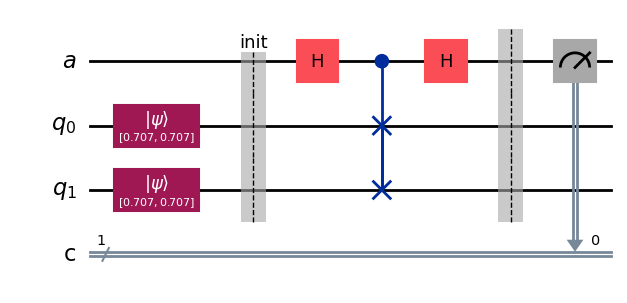

In [4]:
qc = swap_test([1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),1/np.sqrt(2)])
qc.draw('mpl')

## Test di SWAP su stati uguali

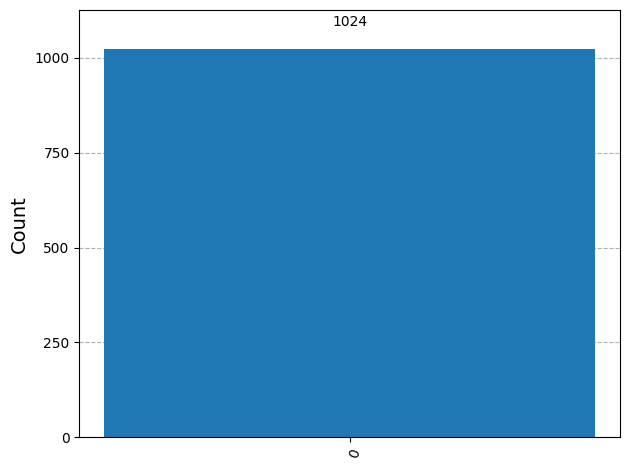

In [5]:
counts = fq.run(qc)
plot_histogram(counts)

## Test di SWAP su stati ortogonali

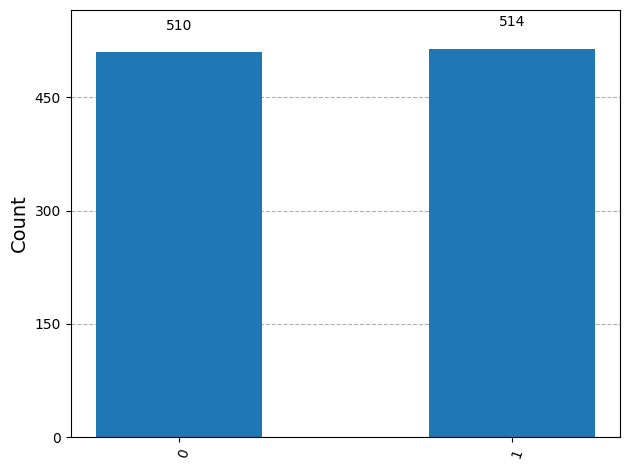

In [6]:
qc = swap_test([1,0], [0,1])
counts = fq.run(qc)
plot_histogram(counts)

## Test di SWAP su stati simili

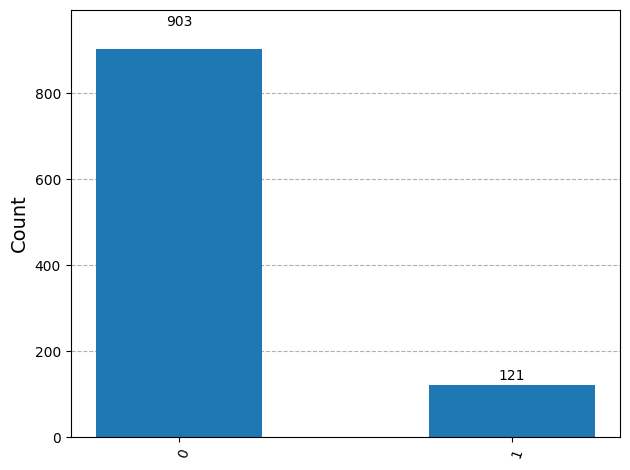

In [7]:
qc = swap_test([1,0], [np.sqrt(3/4),np.sqrt(1/4)])
counts = fq.run(qc)
plot_histogram(counts)

## Test di SWAP tra input e output di un clonatore approssimato

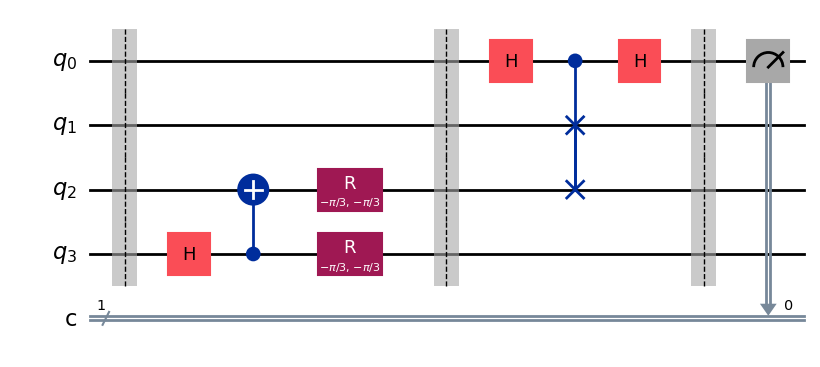

In [8]:
import numpy as np
qc = QuantumCircuit(4,1)
qc.barrier()
qc.h(3)
qc.cx(3,2)
qc.r(-np.pi/3, -np.pi/3,range(2,4))
qc.barrier()
qc.h(0)
qc.cswap(0,1,2)
qc.h(0)
qc.barrier()
qc.measure(0,0)
qc.draw('mpl')

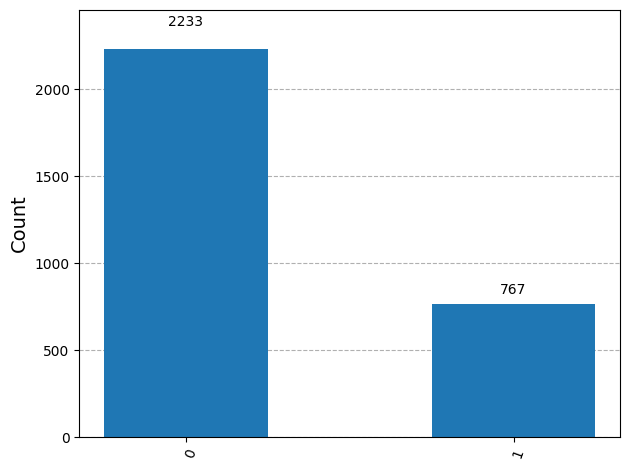

In [30]:
counts = fq.run(qc, 3000)
plot_histogram(counts)

L'esperienza rispetta i risultati teorici, con un rapporto, e quindi una somiglianza di $\sim 0.75\%$.